In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from numpy import linalg as LA, inf, random as rand
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

## Generate noisy time signal

In [2]:
fs = 1024                   
t = np.linspace(0, 1, fs, endpoint=False) 

# Define dominant frequencies and their amplitudes
frequencies = [230, 240, 250, 260, 270]  
amplitudes  = [0.006, 0.008, 0.01, 0.008, 0.006] 

# Create the time-domain signal as a sum of sinusoids
signal = np.zeros_like(t)
for f, a in zip(frequencies, amplitudes):
    signal += a * np.sin(2 * np.pi * f * t)
    
# Add a small amount of noise to the entire signal
noise_level = 0.04  # Adjust noise amplitude as needed
signal_noisy = signal + noise_level * np.random.randn(len(t))


# Compute the Fourier transform (FFT)
fft_vals = np.fft.rfft(signal_noisy)
fft_freqs = np.fft.rfftfreq(len(signal_noisy), d=1/fs)

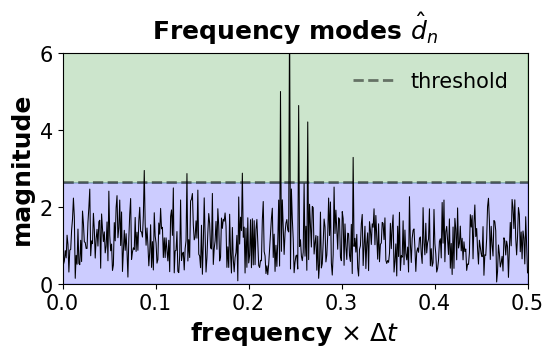

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3)) 

plt.plot(fft_freqs/fs, np.abs(fft_vals), 'k-', lw=0.75)
median_threshold = 2.5 * np.median(np.abs(fft_vals))
plt.axhline(median_threshold, ls='--', c='k', lw=2, alpha=0.5, label=r'threshold')

ax.fill_between(fft_freqs/fs, 0, median_threshold, color='blue', alpha=0.2)
ax.fill_between(fft_freqs/fs, median_threshold, 8, color='green', alpha=0.2)

ax.set_ylabel(r'magnitude', fontsize=18, fontweight='bold'), ax.set_xlabel(r'frequency $\times~\Delta t$', fontsize=18, fontweight='bold')
ax.set_ylim([0, 6]), ax.set_xlim([0, fft_freqs[-1]/fs])
ax.set_title(r'Frequency modes $\hat{d}_n$', fontsize=18, pad=10, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(loc='best', edgecolor='none', facecolor='none', fontsize=15)
plt.savefig('./figures/Freq_Spec.png', bbox_inches='tight')

## Generate denoised time signal

In [5]:
fft_vals = np.fft.rfft(signal_noisy)
fft_freqs = np.fft.rfftfreq(len(signal_noisy), d=1/fs)
median_val = 2.5 * np.median(np.abs(fft_vals))
fft_filtered = fft_vals.copy()
fft_filtered[np.abs(fft_filtered) < median_val] = 0

signal_denoised = np.fft.irfft(fft_filtered, n=len(signal_noisy))
mae_noisy = np.mean(np.abs(signal_noisy - signal))
mae_denoised = np.mean(np.abs(signal_denoised - signal))

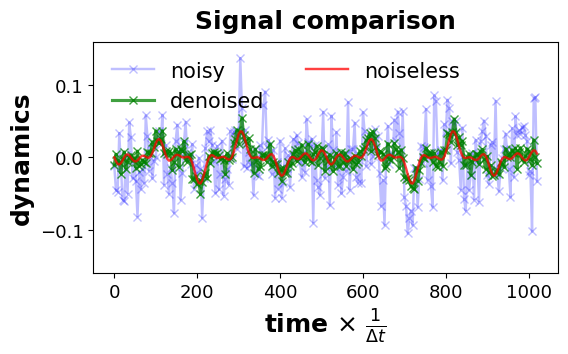

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3)) 

pp = 4
ax.plot(t[::pp]*fs, signal_noisy[::pp], 'bx-', lw=1.75, alpha=0.25, label=r'noisy')
ax.plot(t[::pp]*fs, signal_denoised[::pp], 'gx-', lw=2.25, alpha=0.75, label=r'denoised')
ax.plot(t[::pp]*fs, signal[::pp], 'r', lw=1.75, alpha=0.75, label='noiseless')

ax.set_ylabel(r'dynamics', fontsize=18, fontweight='bold'), ax.set_xlabel(r'time $\times~\frac{1}{\Delta t}$', fontsize=18, fontweight='bold')
ax.set_ylim([-0.16, 0.16])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(loc='best', ncol=2, edgecolor='none', facecolor='none', fontsize=15)
ax.set_title(r'Signal comparison', fontsize=18, pad=10, fontweight='bold')
plt.savefig('./figures/Denoise_Traj.pdf', bbox_inches='tight')

In [6]:
# fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# for i in range(2):
    
#     ax[i].plot(x, y, c='k')
#     ax[i].set_ylabel(r'$y$', fontsize=18), ax[i].set_xlabel(r'$x$', fontsize=18)
#     ax[i].set_title(r'$y=x$', fontsize=18, pad=10)
#     ax[i].tick_params(axis='both', which='major', labelsize=15)

# fig.subplots_adjust(wspace=0.5)